In [28]:
!pip install tensorflow==1.15.0

In [29]:

#mounting my drive
from google.colab import drive
drive.mount('/content/drive')

#-----------------------------'
#chaning the directory
import os
os.chdir("/content/drive/My Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

import numpy as np
import cv2
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from keras.models import model_from_json
import matplotlib.pyplot as plt
from os import listdir

In [0]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [0]:
def loadVggFaceModel():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(Convolution2D(4096, (7, 7), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(4096, (1, 1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(2622, (1, 1)))
	model.add(Flatten())
	model.add(Activation('softmax'))
	
	return model


In [0]:

def ageModel():
	model = loadVggFaceModel()
	
	base_model_output = Sequential()
	base_model_output = Convolution2D(101, (1, 1), name='predictions')(model.layers[-4].output)
	base_model_output = Flatten()(base_model_output)
	base_model_output = Activation('softmax')(base_model_output)
	
	age_model = Model(inputs=model.input, outputs=base_model_output)
	
	age_model.load_weights('age_model_weights.h5')
	
	return age_model

In [0]:
def genderModel():
	model = loadVggFaceModel()
	
	base_model_output = Sequential()
	base_model_output = Convolution2D(2, (1, 1), name='predictions')(model.layers[-4].output)
	base_model_output = Flatten()(base_model_output)
	base_model_output = Activation('softmax')(base_model_output)

	gender_model = Model(inputs=model.input, outputs=base_model_output)
	
	gender_model.load_weights("gender_model_weights.h5")
	
	return gender_model

In [0]:
age_model = ageModel()
gender_model = genderModel()

In [36]:
print(age_model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_27_input (Inp (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_27 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_28 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_29 (ZeroPaddi (None, 114, 114, 64)      0   

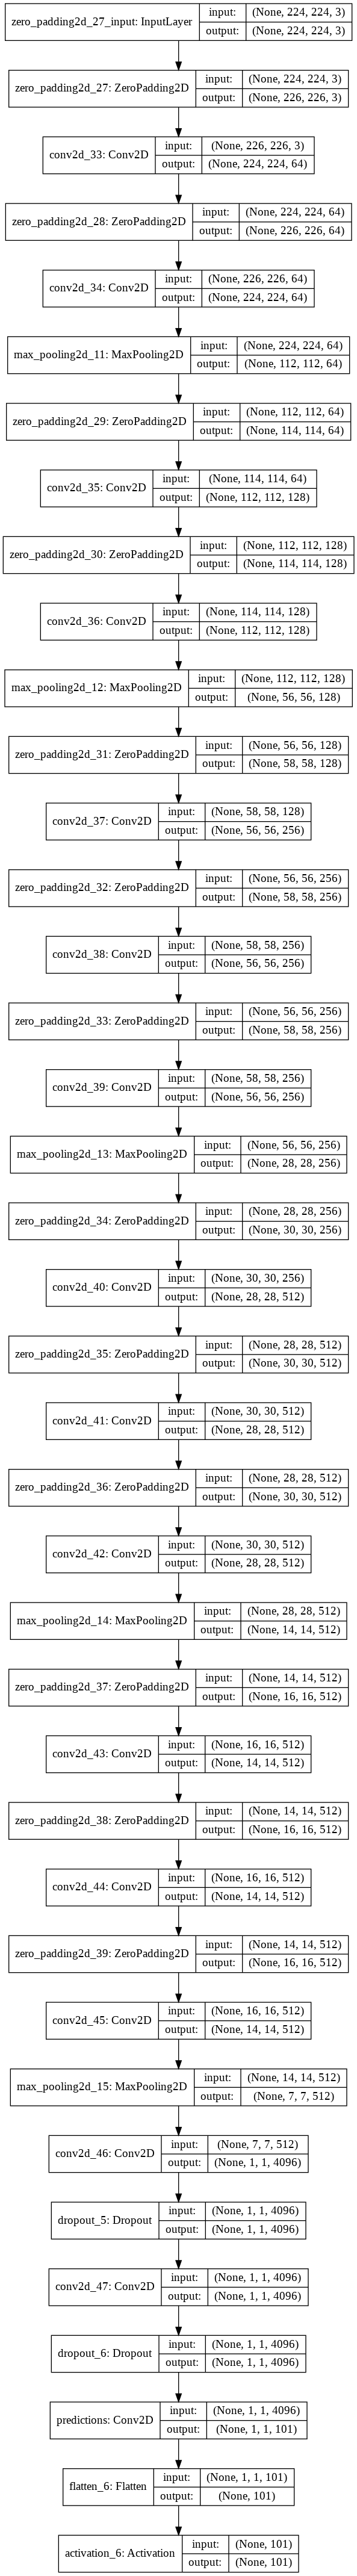

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(age_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [38]:
print(gender_model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_40_input (Inp (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_40 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_41 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_42 (ZeroPaddi (None, 114, 114, 64)      0   

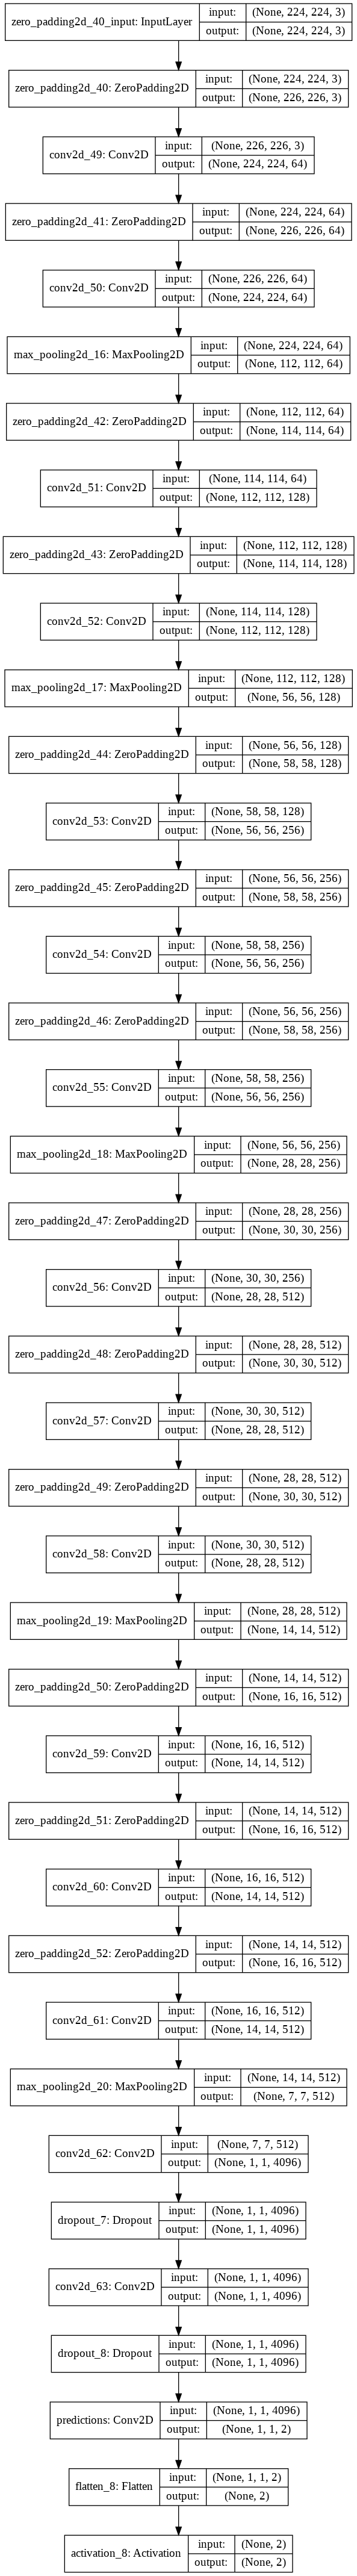

In [39]:
plot_model(gender_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

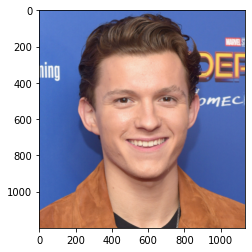

apparent age:  19
gender:  Man


In [43]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

picture = "tom.jpg"


prediction_age = age_model.predict(preprocess_image(picture))
prediction_gender = gender_model.predict(preprocess_image(picture))
output_indexes = np.array([i for i in range(0, 101)])
img = image.load_img(picture)#, target_size=(224, 224))
plt.imshow(img)
plt.show()


apparent_age = np.round(np.sum(prediction_age * output_indexes, axis = 1))
print("apparent age: ", int(apparent_age[0]))
#-----------------------------------gender
gender = "Man" if np.argmax(prediction_gender) == 1 else "Woman"

print("gender: ", gender)